In [15]:
from collections import Counter
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
x,y = make_classification(n_samples=10000,n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [10]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

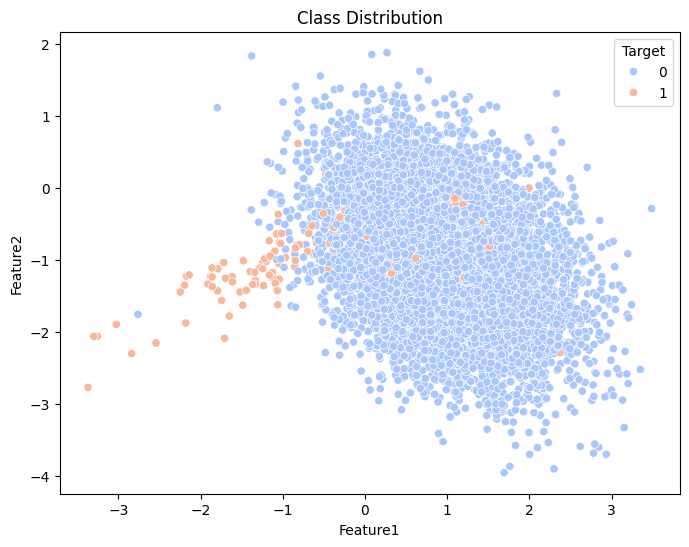

In [14]:
# Converting to DataFrame for better readability
df = pd.DataFrame(x, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Target', data=df, palette='coolwarm')
plt.title("Class Distribution")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [17]:
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1,0.1,1.0,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [21]:
params = dict(penalty=penalty,C=c_values,solver = solver,class_weight=class_weight)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold 
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [24]:
grid.fit(x_train,y_train)

c:\repos\Simple-Linear-Regression\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\repos\Simple-Linear-Regression\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\repos\Simple-Linear-Regression\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\repos\Simple-Linear-Regression\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\repos\Simple-Linear-Regression\venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\repos\Simple-Linear-Regression\venv\l

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 1.0, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [25]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [26]:
y_pred = grid.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score = accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9876
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2485
           1       0.31      0.87      0.46        15

    accuracy                           0.99      2500
   macro avg       0.65      0.93      0.72      2500
weighted avg       1.00      0.99      0.99      2500

[[2456   29]
 [   2   13]]
